# Import Data và đặt câu hỏi đúng: 

In [39]:
import pandas as pd

# Load dữ liệu từ dataframe 
df = pd.read_excel('kickoff_data.xlsx')
problems_column_data = df['Vấn đề mà doanh nghiệp, tổ chức của bạn đang gặp phải là gì? Hãy chia sẻ thật cụ thể']
print(problems_column_data)



0       Đội ngũ chưa đoàn kết và năng lực cần phát triển
1                                     Cách kết nối ko có
2                                          Nhân sự bỏ đi
3                                      Lảnh đạo đội nhóm
4                         Muốn đội ngũ làm việc hiệu quả
                             ...                        
252                              Chưa tuyển được nhân sự
253    Năng suất lao động thấp, không định hướng được...
254                                         Mất đoàn kết
255                             Không gặp phải vấn đề gì
256                                      Phát triển chậm
Name: Vấn đề mà doanh nghiệp, tổ chức của bạn đang gặp phải là gì? Hãy chia sẻ thật cụ thể, Length: 257, dtype: object



Để phân cụm dataframe này, ta có thể sử dụng kỹ thuật phân tích cụm (clustering) để tìm ra những nhóm vấn đề tương tự.

Trước tiên, ta cần tiền xử lý dữ liệu và chuyển đổi các câu văn trong dataframe thành các vector số để có thể áp dụng các thuật toán phân tích cụm. Cụ thể, ta có thể sử dụng các kỹ thuật như Bag of Words, TF-IDF hoặc Word Embedding để thực hiện việc này.

Sau khi đã chuyển đổi các câu văn thành các vector số, ta có thể áp dụng các thuật toán clustering như K-Means, Hierarchical Clustering hoặc DBSCAN để phân cụm các câu văn thành các nhóm tương đồng với nhau.

Với dataframe này, ta có thể phân cụm thành các nhóm sau:

1. Nhóm vấn đề về nhân sự: bao gồm các câu như "Nhân sự bỏ đi", "Chưa tuyển được nhân sự".
2. Nhóm vấn đề về đội ngũ và lãnh đạo: bao gồm các câu như "Đội ngũ chưa đoàn kết và năng lực cần phát triển", "Lảnh đạo đội nhóm", "Muốn đội ngũ làm việc hiệu quả", "Mất đoàn kết".
3. Nhóm vấn đề về kết nối và giao tiếp: bao gồm câu "Cách kết nối ko có".
4. Nhóm vấn đề phát triển chậm: chỉ có câu "Phát triển chậm".

Tuy nhiên, để phân cụm chính xác hơn thì ta cần xem xét kỹ hơn các từ trong các câu văn, cũng như sử dụng các kỹ thuật và thuật toán phù hợp để đạt được kết quả tốt nhất.

# 1. Vector hóa: 
- Tuy nhiên, với số lượng câu ít và phạm vi vấn đề không rộng lớn, TF-IDF có thể là một giải pháp đơn giản hơn và phù hợp hơn. Trong khi đó, LDA được ưa chuộng hơn khi phạm vi vấn đề lớn hơn và có nhiều chủ đề liên quan đến đội ngũ hơn.

Đoạn code trên có chức năng sử dụng thuật toán KMeans để phân cụm văn bản. Cụ thể, nó bao gồm các bước như sau:

1. Đọc dữ liệu từ một tệp Excel và tạo một dataframe để chứa dữ liệu.
2. Tiền xử lý văn bản: loại bỏ stopwords và chuẩn hóa text.
3. Sử dụng TfidfVectorizer để tạo ma trận TF-IDF cho corpus của các văn bản đã được tiền xử lý.


In [40]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Tải danh sách stopwords tiếng Việt
stopwords = set(stopwords.words('vietnamese'))

# Load data từ dataframe 
df = pd.read_excel('kickoff_data.xlsx')
df['original_text']= df['Vấn đề mà doanh nghiệp, tổ chức của bạn đang gặp phải là gì? Hãy chia sẻ thật cụ thể']

# Xóa các stopword và chuẩn hóa văn bản
def preprocess(text):
    words = nltk.word_tokenize(text.lower())
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

df['normalized_text'] = df['original_text'].fillna('').astype(str).apply(preprocess)

# Tạo ma trận TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['normalized_text'])



# 2. Clustering

4. Sử dụng KMeans để phân cụm các văn bản theo số lượng cụm được chỉ định.
5. Trích xuất các từ khóa quan trọng trong từng cụm bằng cách tính tổng điểm TF-IDF và lấy danh sách các từ theo thứ tự giảm dần của điểm số.
6. Gán nhãn cho mỗi cụm dựa trên các từ khóa quan trọng và in ra kết quả.

KMeans alg based on TF-IDF vectors

In [41]:
from sklearn.cluster import KMeans
import numpy as np

# Tạo mô hình KMeans với số cụm mong muốn
num_clusters = 4
km = KMeans(n_clusters=num_clusters)

# Huấn luyện mô hình trên ma trận TF-IDF
km.fit(tfidf_matrix)

# Lấy nhãn của từng văn bản
clusters = km.labels_.tolist()


# Lấy các điểm trung tâm của từng cụm
centroids = km.cluster_centers_
def get_top_keywords(matrix, n=5):
    """
    Trả về danh sách n từ khóa quan trọng nhất trong ma trận TF-IDF.
    
    Tham số:
    - matrix: ma trận TF-IDF của các văn bản trong một cụm
    - n: số lượng từ khóa cần trả về (mặc định là 5)
    """
    # Tính toán tổng điểm TF-IDF cho mỗi từ
    scores = matrix.sum(axis=0)

    # Lấy danh sách các từ theo thứ tự giảm dần của điểm số
    keywords = [(word, scores[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    keywords = sorted(keywords, key=lambda x: -x[1])

    # Trả về n từ khóa đầu tiên
    top_keywords = [keyword[0] for keyword in keywords[:n]]
    
    return top_keywords

# Đặt tên cho các cụm dựa trên nội dung
for i in range(num_clusters):
    cluster_docs = [j for j, x in enumerate(clusters) if x == i]
    cluster_tfidf = tfidf_matrix[cluster_docs]
    cluster_keywords = get_top_keywords(cluster_tfidf, n=5)
    cluster_label = "Cụm " + str(i+1) + ": " + ", ".join(cluster_keywords)
    cluster_mask = np.array(clusters) == i
    df.loc[cluster_mask, 'cluster'] = cluster_label
    

# In ra kết quả phân cụm
print(df.groupby('cluster').size())




c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
Cụm 1: học, phát, lực, quản, triển    141
Cụm 2: nhân, quản, viên, lý, đào       33
Cụm 3: đội, ngũ, xây, dựng, hiệu       42
Cụm 4: kết, đoàn, gắn, đội, nối        41
dtype: int64


# Output

In ra từng cụm và các văn bản gốc của từng cụm

In [42]:
# Đặt tên cho các cụm dựa trên nội dung và in ra kết quả phân cụm
for i in range(num_clusters):
    cluster_docs = [j for j, x in enumerate(clusters) if x == i]
    cluster_tfidf = tfidf_matrix[cluster_docs]
    cluster_keywords = get_top_keywords(cluster_tfidf, n=5)
    cluster_label = "Cụm " + str(i+1) + ": " + ", ".join(cluster_keywords)
    print(cluster_label)
    
    # In các văn bản gốc của từng cụm
    for idx, doc_index in enumerate(cluster_docs):
        print(f"- Khách hàng {idx+1}: {df.iloc[doc_index]['original_text']}")



Cụm 1: học, phát, lực, quản, triển
- Khách hàng 1: Lảnh đạo đội nhóm
- Khách hàng 2: Đóng gói quy trình và xây dựng văn hóa doanh nghiệp
- Khách hàng 3: Chưa nâng đỡ được anh em trong team học hỏi, kaizen
- Khách hàng 4: Lãnh đạo đội nhóm
- Khách hàng 5: chưa định hình văn hoá doanh nghiệp
- Khách hàng 6: nan
- Khách hàng 7: Đội ngũ nhân viên chưa thực sự gắn kết,xảy ra những mâu thuẫn nội bộ,rất mong muốn có thể tìm được giải pháp.
- Khách hàng 8: Điện lạnh
- Khách hàng 9: kiến thức 3 gốc
- Khách hàng 10: Đoàn ket
- Khách hàng 11: Chưa khai thác và sử dụng đúng tiềm năng của CNV.  Quản lý cồng kềnh, chưa tạo được động lực làm việc. Tìm câu trả lời cho câu hỏi” làm thế nào để làm việc hạnh phúc”. Làm thế nào để đưa 3 gốc vào doanh nghiệp. 
- Khách hàng 12: Có cá nhân làm việc ko theo đc đội nhóm
- Khách hàng 13: mọi người còn tị nạnh nhau trong công việc
- Khách hàng 14: Gắn kết và truyền cảm hứng cho nhân viên chưa hiệu quả
- Khách hàng 15: Đội nhóm còn yếu thiếu tinh thần Team Work, 

# Chọn k và vấn đề tối ưu

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

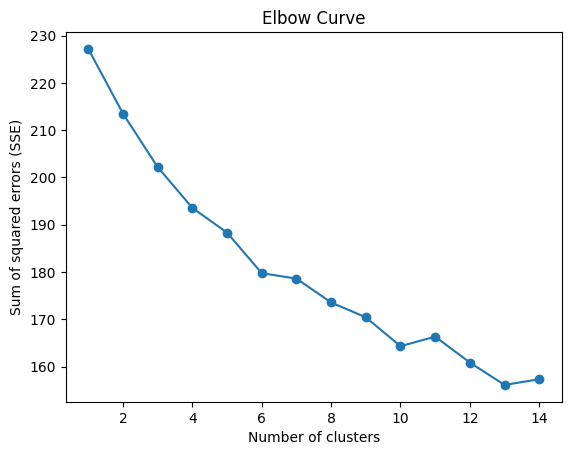

In [43]:
import matplotlib.pyplot as plt

# Create a list of TF-IDF weighted document vectors
doc_vectors = tfidf_matrix.toarray()

# Calculate the sum of squared distances for each number of clusters
sse = []  # Sum of Squared Errors
for k in range(1, 15):
    km = KMeans(n_clusters=k)
    km.fit(doc_vectors)
    sse.append(km.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
plt.plot(range(1, 15), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Curve')
plt.show()

Điểm kỷ nguyên (Elbow point) là điểm trên đường cong Elbow Curve tương ứng với giá trị k mà sau đó việc gia tăng số lượng cụm sẽ không cải thiện rõ ràng chất lượng phân cụm. Nghĩa là, điểm kỷ nguyên biểu thị cho giá trị k tối ưu để sử dụng trong thuật toán K-means clustering. 

Để xác định điểm kỷ nguyên, ta nên quan sát đồ thị của đường cong Elbow Curve và tìm điểm khi đường cong bắt đầu duỗi ra hay "khuỷu" của đường cong bắt đầu phẳng. Điều này có nghĩa là biểu đồ chỉ ra rằng tăng số lượng cụm sau điểm này sẽ không cải thiện đáng kể kết quả.

Tuy nhiên, điểm kỷ nguyên không phải luôn có thể được xác định rõ ràng và chính xác, nó có thể thay đổi tuỳ thuộc vào dữ liệu và tính chất của chúng. Do đó, quyết định cuối cùng về giá trị k nên dựa trên sự hiểu biết chuyên môn về dữ liệu và mục tiêu của việc phân cụm, cũng như được thực nghiệm và đánh giá kết quả phân cụm.

 Silhouette để xác định số lượng cụm tối ưu cho việc phân nhóm.

Sau khi phân nhóm các câu trả lời thành các cụm khác nhau, ta có thể sử dụng các kỹ thuật trực quan hóa để mô tả đặc điểm của từng cụm và tìm ra các vấn đề phổ biến mà doanh nghiệp đang gặp phải.

In [44]:
from sklearn.metrics import silhouette_score

# Tạo danh sách số lượng cụm cần thử
num_clusters_list = range(2, 25)

# Tạo danh sách tuple (tên cụm, silhouette score)
cluster_silhouette_scores = []

# Lặp qua mỗi số lượng cụm
for num_clusters in num_clusters_list:
    km = KMeans(n_clusters=num_clusters)
    km.fit(tfidf_matrix)
    cluster_labels = km.labels_
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    cluster_silhouette_scores.append((f'Cụm {num_clusters}', silhouette_avg))

# Chuyển danh sách tuple thành DataFrame
cluster_df = pd.DataFrame(cluster_silhouette_scores, columns=['cluster', 'silhouette_score'])

# Sắp xếp DataFrame theo abs(1 - silhouette_score) tăng dần và tên cụm
sorted_cluster_df = cluster_df.copy()
sorted_cluster_df['abs_diff'] = abs(sorted_cluster_df['silhouette_score'] - 1)
sorted_cluster_df = sorted_cluster_df.sort_values(['abs_diff', 'cluster'], ascending=[True, True])
sorted_cluster_df = sorted_cluster_df.drop('abs_diff', axis=1)

# In ra kết quả phân cụm và abs(1 - silhouette_score)
print(f"{'Cluster':<10} {'Silhouette Score':<20} {'Abs(1-Score)':<20}")
for index, row in sorted_cluster_df.iterrows():
    print(f"{row['cluster']:<10} {row['silhouette_score']:<20} {abs(row['silhouette_score'] - 1):<20}")


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

Cluster    Silhouette Score     Abs(1-Score)        
Cụm 24     0.2082192333376551   0.7917807666623449  
Cụm 22     0.2070542213899297   0.7929457786100703  
Cụm 23     0.20142317226448048  0.7985768277355195  
Cụm 21     0.19902011165930464  0.8009798883406953  
Cụm 19     0.1860147351709709   0.8139852648290291  
Cụm 18     0.18404898539896355  0.8159510146010365  
Cụm 20     0.18049782865144798  0.819502171348552   
Cụm 17     0.17915369952728114  0.8208463004727189  
Cụm 15     0.1761416492316186   0.8238583507683814  
Cụm 13     0.17106772032545817  0.8289322796745419  
Cụm 16     0.1694066039774995   0.8305933960225005  
Cụm 14     0.16847537124590875  0.8315246287540913  
Cụm 12     0.1566456014047729   0.8433543985952271  
Cụm 10     0.1441447140653952   0.8558552859346048  
Cụm 9      0.14125018510910967  0.8587498148908903  
Cụm 11     0.13795150371376044  0.8620484962862396  
Cụm 8      0.12564053632113706  0.874359463678863   
Cụm 7      0.12394773537399566  0.876052264626